In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import numpy as np
import glob
mpl.style.use('seaborn-talk')
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
%%cpp -d

#include "sPhenixStyle.C"
#include "SaveCanvas.C"
#include <TStyle.h>

In [3]:
%%cpp

SetsPhenixStyle();
gStyle->SetOptStat(0);
gStyle->SetOptFit(1111);
TVirtualFitter::SetDefaultFitter("Minuit2");

gSystem->Load("libg4eval.so");

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [4]:
base_dir = 'production-3-full-beam-full-magnet'

# base_dir = 'Scraper at z 350 cm'


detector_map = {
    'MAPS Vertex' : ['MVTX'],
    'TPC Tracker' : ['SVTX'],
    'e-going GEM' : ['EGEM_0', 'EGEM_1', 'EGEM_2', 'EGEM_3'],
    'h-going GEM' : ['FGEM_2', 'FGEM_3', 'FGEM_4'],
    'Forward Silicon' : ['FST_0', 'FST_1','FST_2','FST_3','FST_4']
}

In [5]:
df_facets= pd.read_csv(os.path.join(base_dir, 'Facet_CheckAll.csv'))
df_facets.set_index('Facet', inplace=True)
df_facets

,Flux,Phi
Facet,,
18964.0,2.700000e+15,0.423537
18965.0,6.220000e+15,0.257193
18966.0,5.280000e+15,0.059895
18967.0,5.280000e+15,-0.059974
18968.0,6.210000e+15,-0.257590
18982.0,1.620000e+15,-2.709813
18983.0,3.340000e+15,-2.897719
18984.0,2.320000e+16,-3.085536
18985.0,2.320000e+16,3.085618


In [6]:
dict_rate = {'Facet' : [], 'Flux' : [],'Phi' : [],'Flux_Normalization_Scale' : []}


print(detector_map)

for name, entries in detector_map.items():
    dict_rate[name] = []
    for entry in entries:
        dict_rate[entry] = []

print(dict_rate)

{'MAPS Vertex': ['MVTX'], 'TPC Tracker': ['SVTX'], 'e-going GEM': ['EGEM_0', 'EGEM_1', 'EGEM_2', 'EGEM_3'], 'h-going GEM': ['FGEM_2', 'FGEM_3', 'FGEM_4'], 'Forward Silicon': ['FST_0', 'FST_1', 'FST_2', 'FST_3', 'FST_4']}
{'Facet': [], 'Flux': [], 'Phi': [], 'Flux_Normalization_Scale': [], 'MAPS Vertex': [], 'MVTX': [], 'TPC Tracker': [], 'SVTX': [], 'e-going GEM': [], 'EGEM_0': [], 'EGEM_1': [], 'EGEM_2': [], 'EGEM_3': [], 'h-going GEM': [], 'FGEM_2': [], 'FGEM_3': [], 'FGEM_4': [], 'Forward Silicon': [], 'FST_0': [], 'FST_1': [], 'FST_2': [], 'FST_3': [], 'FST_4': []}


In [7]:
# facet = int(18966)

for facet_f in df_facets.index.to_list():
    facet = int(facet_f)
    filenames = glob.glob(os.path.join(base_dir, f'{facet}.[0-9]*.csv_SynRadAna.root'))
#     print(len(filenames))

    src_filenames=" ".join(filenames);
    joint_file = os.path.join(base_dir, f'{facet}_SUM.csv_SynRadAna.root')

    if (not os.path.exists(joint_file)):
        print(os.popen(f'hadd -f {joint_file} {src_filenames} ').read())
    else:
        print(os.popen(f'ls -lhv {joint_file} ').read())

-rw-r--r-- 1 jinhuang rhphenix 97K May 28 09:21 production-3-full-beam-full-magnet/18964_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 98K May 28 09:21 production-3-full-beam-full-magnet/18965_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 200K May 28 00:20 production-3-full-beam-full-magnet/18966_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 199K May 28 09:21 production-3-full-beam-full-magnet/18967_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 98K May 28 09:21 production-3-full-beam-full-magnet/18968_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 95K May 28 09:21 production-3-full-beam-full-magnet/18982_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 97K May 28 09:21 production-3-full-beam-full-magnet/18983_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 161K May 28 09:21 production-3-full-beam-full-magnet/18984_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 161K May 28 09:21 production-3-full-beam-full-magnet/18985_SUM

In [8]:

for facet_f in df_facets.index.to_list():
    facet = int(facet_f)
    
    joint_file = os.path.join(base_dir, f'{facet}_SUM.csv_SynRadAna.root')
    facet_flux_noarmlized = df_facets.loc[facet,'Flux']
    facet_phi_ave = df_facets.loc[facet,'Phi']
    
    root_file = ROOT.TFile.Open(joint_file)
    h_SynRadAna_Normalization = root_file.Get('h_SynRadAna_Normalization')
    facet_flux_noarmlization_scale = facet_flux_noarmlized / h_SynRadAna_Normalization.GetBinContent(3);
    print(f'Facet {facet} scale = {facet_flux_noarmlization_scale:.2e} @ phi = {facet_phi_ave:.2f}')
    
    dict_rate['Facet'].append(facet)
    dict_rate['Flux'].append(facet_flux_noarmlized)
    dict_rate['Phi'].append(facet_phi_ave)
    dict_rate['Flux_Normalization_Scale'].append(facet_flux_noarmlization_scale)
    
    for detector_group, entries in detector_map.items():
        group_rate = 0
        
        for detector in entries:
            
            h_SynRadAna_nHit = root_file.Get(f'h_SynRadAna_{detector}_nHit')
            h_SynRadAna_nHit = root_file.Get(f'h_SynRadAna_{detector}_nHit')
            h_SynRadAna_nHit_flux = h_SynRadAna_nHit.ProjectionX(f'h_SynRadAna_{detector}_nHit_flux',1,1)
            h_SynRadAna_nHit_flux.Scale(facet_flux_noarmlization_scale);
            # Rate sum hit
#             Rate = h_SynRadAna_nHit_flux.GetMean()*h_SynRadAna_nHit_flux.GetSum()
            #rate sum photons
            Rate = h_SynRadAna_nHit_flux.Integral(1,-1)
        
            group_rate = group_rate + Rate

            dict_rate[detector].append(Rate)
            
        dict_rate[detector_group].append(group_rate)

Facet 18964 scale = 9.06e-05 @ phi = 0.42
Facet 18965 scale = 2.09e-04 @ phi = 0.26
Facet 18966 scale = 2.62e-04 @ phi = 0.06
Facet 18967 scale = 2.63e-04 @ phi = -0.06
Facet 18968 scale = 2.10e-04 @ phi = -0.26
Facet 18982 scale = 5.42e-05 @ phi = -2.71
Facet 18983 scale = 1.13e-04 @ phi = -2.90
Facet 18984 scale = 8.59e-04 @ phi = -3.09
Facet 18985 scale = 8.60e-04 @ phi = 3.09
Facet 18986 scale = 1.13e-04 @ phi = 2.90
Facet 18987 scale = 5.46e-05 @ phi = 2.71


In [9]:
df_rate = pd.DataFrame(dict_rate)
df_rate

,Facet,Flux,Phi,Flux_Normalization_Scale,MAPS Vertex,MVTX,TPC Tracker,SVTX,e-going GEM,EGEM_0,...,h-going GEM,FGEM_2,FGEM_3,FGEM_4,Forward Silicon,FST_0,FST_1,FST_2,FST_3,FST_4
0,18964,2.700000e+15,0.423537,0.000091,2.700000e+15,2.700000e+15,2.700000e+15,2.700000e+15,1.080000e+16,2.700000e+15,...,8.100000e+15,2.700000e+15,2.700000e+15,2.700000e+15,1.350000e+16,2.700000e+15,2.700000e+15,2.700000e+15,2.700000e+15,2.700000e+15
1,18965,6.220000e+15,0.257193,0.000209,6.220000e+15,6.220000e+15,6.220000e+15,6.220000e+15,2.488000e+16,6.220000e+15,...,1.866000e+16,6.220000e+15,6.220000e+15,6.220000e+15,3.110000e+16,6.220000e+15,6.220000e+15,6.220000e+15,6.220000e+15,6.220000e+15
2,18966,5.280000e+15,0.059895,0.000262,5.280000e+15,5.280000e+15,5.280000e+15,5.280000e+15,2.112000e+16,5.280000e+15,...,1.584000e+16,5.280000e+15,5.280000e+15,5.280000e+15,2.640000e+16,5.280000e+15,5.280000e+15,5.280000e+15,5.280000e+15,5.280000e+15
3,18967,5.280000e+15,-0.059974,0.000263,5.280000e+15,5.280000e+15,5.280000e+15,5.280000e+15,2.112000e+16,5.280000e+15,...,1.584000e+16,5.280000e+15,5.280000e+15,5.280000e+15,2.640000e+16,5.280000e+15,5.280000e+15,5.280000e+15,5.280000e+15,5.280000e+15
4,18968,6.210000e+15,-0.257590,0.000210,6.210000e+15,6.210000e+15,6.210000e+15,6.210000e+15,2.484000e+16,6.210000e+15,...,1.863000e+16,6.210000e+15,6.210000e+15,6.210000e+15,3.105000e+16,6.210000e+15,6.210000e+15,6.210000e+15,6.210000e+15,6.210000e+15
5,18982,1.620000e+15,-2.709813,0.000054,1.620000e+15,1.620000e+15,1.620000e+15,1.620000e+15,6.480000e+15,1.620000e+15,...,4.860000e+15,1.620000e+15,1.620000e+15,1.620000e+15,8.100000e+15,1.620000e+15,1.620000e+15,1.620000e+15,1.620000e+15,1.620000e+15
6,18983,3.340000e+15,-2.897719,0.000113,3.340000e+15,3.340000e+15,3.340000e+15,3.340000e+15,1.336000e+16,3.340000e+15,...,1.002000e+16,3.340000e+15,3.340000e+15,3.340000e+15,1.670000e+16,3.340000e+15,3.340000e+15,3.340000e+15,3.340000e+15,3.340000e+15
7,18984,2.320000e+16,-3.085536,0.000859,2.320000e+16,2.320000e+16,2.320000e+16,2.320000e+16,9.280000e+16,2.320000e+16,...,6.960000e+16,2.320000e+16,2.320000e+16,2.320000e+16,1.160000e+17,2.320000e+16,2.320000e+16,2.320000e+16,2.320000e+16,2.320000e+16
8,18985,2.320000e+16,3.085618,0.000860,2.320000e+16,2.320000e+16,2.320000e+16,2.320000e+16,9.280000e+16,2.320000e+16,...,6.960000e+16,2.320000e+16,2.320000e+16,2.320000e+16,1.160000e+17,2.320000e+16,2.320000e+16,2.320000e+16,2.320000e+16,2.320000e+16
9,18986,3.330000e+15,2.897815,0.000113,3.330000e+15,3.330000e+15,3.330000e+15,3.330000e+15,1.332000e+16,3.330000e+15,...,9.990000e+15,3.330000e+15,3.330000e+15,3.330000e+15,1.665000e+16,3.330000e+15,3.330000e+15,3.330000e+15,3.330000e+15,3.330000e+15


In [10]:
dict_rate

{'Facet': [18964,
  18965,
  18966,
  18967,
  18968,
  18982,
  18983,
  18984,
  18985,
  18986,
  18987],
 'Flux': [2700000000000000.0,
  6220000000000000.0,
  5280000000000000.0,
  5280000000000000.0,
  6210000000000000.0,
  1620000000000000.0,
  3340000000000000.0,
  2.32e+16,
  2.32e+16,
  3330000000000000.0,
  1620000000000000.0],
 'Phi': [0.4235373684382843,
  0.25719345150662754,
  0.05989453525584972,
  -0.059974337356304974,
  -0.2575901099304566,
  -2.709813471190812,
  -2.8977192797968723,
  -3.0855357239802124,
  3.0856184475422186,
  2.8978152072726244,
  2.7095285153355086],
 'Flux_Normalization_Scale': [9.061091543363906e-05,
  0.00020940020196345724,
  0.0002616037983809279,
  0.00026298354210617874,
  0.00020978863355518434,
  5.421131728756921e-05,
  0.00011339265059543502,
  0.0008590408959910045,
  0.000859780685929192,
  0.00011300716873873487,
  5.462028029023976e-05],
 'MAPS Vertex': [2700000000000000.0,
  6220000000000000.0,
  5280000000000000.0,
  52800000000

In [11]:
facet = 18966

joint_file = os.path.join(base_dir, f'{facet}_SUM.csv_SynRadAna.root')
facet_flux_noarmlized = df_facets.loc[facet,'Flux']
facet_phi_ave = df_facets.loc[facet,'Phi']

root_file = ROOT.TFile.Open(joint_file)
h_SynRadAna_Normalization = root_file.Get('h_SynRadAna_Normalization')
facet_flux_noarmlization_scale = facet_flux_noarmlized / h_SynRadAna_Normalization.GetBinContent(3);
print(f'Facet {facet} scale = {facet_flux_noarmlization_scale:.2e} @ phi = {facet_phi_ave:.2f}')

Facet 18966 scale = 2.62e-04 @ phi = 0.06


In [12]:
detector_group = 'MAPS Vertex'
detector = 'MVTX'
h_SynRadAna_nHit = root_file.Get(f'h_SynRadAna_{detector}_nHit')
h_SynRadAna_nHit_flux = h_SynRadAna_nHit.ProjectionX(f'h_SynRadAna_{detector}_nHit_flux',1,1)
h_SynRadAna_nHit_flux.Scale(facet_flux_noarmlization_scale);

print( h_SynRadAna_nHit_flux.GetMean()*h_SynRadAna_nHit_flux.GetSum())
print( f'{h_SynRadAna_nHit_flux.Integral(1,-1):.3e}')

588029669472.0774
5.280e+15


Save TH1 h_SynRadAna_Normalization
Save TH1 h_SynRadAna_photonEnergy_flux
Save TH1 h_SynRadAna_MVTXHit_nHit_flux
Save TH1 h_SynRadAna_MVTX_nHit_flux
removed ‘Check.svg’


Info in <TCanvas::Print>: png file Check.png has been created
Info in <TCanvas::SaveAs>: ROOT file Check.root has been created
Info in <TCanvas::Print>: eps file Check.eps has been created
Info in <TCanvas::Print>: SVG file Check.svg has been created
Info in <TCanvas::SaveSource>: C++ Macro file: Check.C has been generated


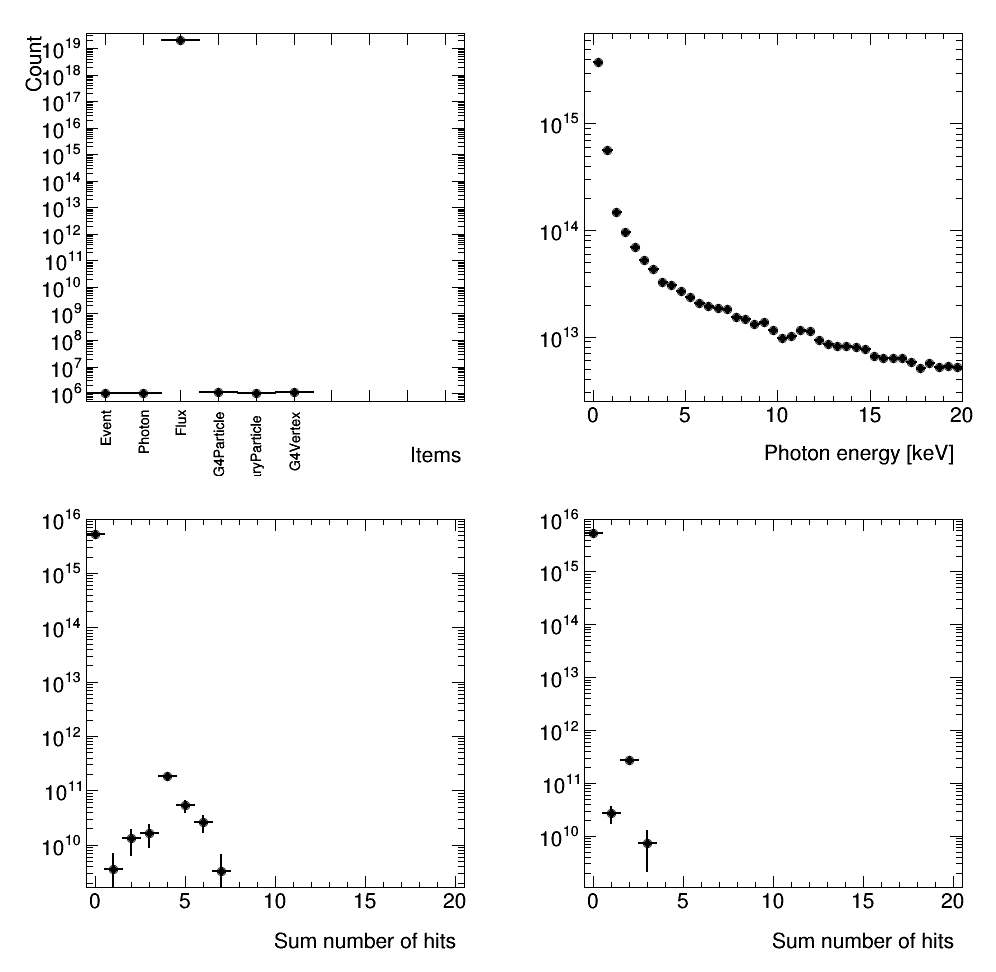

In [13]:
c1 = ROOT.TCanvas( 'Check', 'Check', 1000, 1000)
c1.Divide(2, 2);
idx = 1;

p = c1.cd(idx);
idx = idx + 1;
c1.Update();
p.SetLogy();

h_SynRadAna_Normalization.Draw();


p = c1.cd(idx);
idx = idx + 1;
c1.Update();
p.SetLogy();

h_SynRadAna_photonEnergy = root_file.Get('h_SynRadAna_photonEnergy')
h_SynRadAna_photonEnergy_flux = h_SynRadAna_photonEnergy.ProjectionX('h_SynRadAna_photonEnergy_flux',1,1)
h_SynRadAna_photonEnergy_flux.Scale(facet_flux_noarmlization_scale);
h_SynRadAna_photonEnergy_flux.Rebin(10)
h_SynRadAna_photonEnergy_flux.GetXaxis().SetRangeUser(-.5,20);
h_SynRadAna_photonEnergy_flux.Draw();


p = c1.cd(idx);
idx = idx + 1;
c1.Update();
p.SetLogy();

h_SynRadAna_MVTXHit_nHit = root_file.Get('h_SynRadAna_MVTXHit_nHit')
h_SynRadAna_MVTXHit_nHit_flux = h_SynRadAna_MVTXHit_nHit.ProjectionX('h_SynRadAna_MVTXHit_nHit_flux',1,1)
h_SynRadAna_MVTXHit_nHit_flux.Scale(facet_flux_noarmlization_scale);
h_SynRadAna_MVTXHit_nHit_flux.GetXaxis().SetRangeUser(-.5,20);
h_SynRadAna_MVTXHit_nHit_flux.Draw();


p = c1.cd(idx);
idx = idx + 1;
c1.Update();
p.SetLogy();

h_SynRadAna_MVTX_nHit = root_file.Get('h_SynRadAna_MVTX_nHit')
h_SynRadAna_MVTX_nHit_flux = h_SynRadAna_MVTX_nHit.ProjectionX('h_SynRadAna_MVTX_nHit_flux',1,1)
h_SynRadAna_MVTX_nHit_flux.Scale(facet_flux_noarmlization_scale);
h_SynRadAna_MVTX_nHit_flux.GetXaxis().SetRangeUser(-.5,20);
h_SynRadAna_MVTX_nHit_flux.Draw();

c1.Draw()


ROOT.SaveCanvas(c1,f'', True);

In [14]:
h_SynRadAna_MVTX_nHit_flux.GetMean()*h_SynRadAna_MVTX_nHit_flux.GetSum()

588029669472.0305

In [15]:
root_file.ls()

TFile**		production-3-full-beam-full-magnet/18966_SUM.csv_SynRadAna.root	
 TFile*		production-3-full-beam-full-magnet/18966_SUM.csv_SynRadAna.root	
  OBJ: TH2D	h_SynRadAna_MVTX_nHit	Hit sum : 0 at: 0x7028130
  OBJ: TH2D	h_SynRadAna_photonEnergy	Source photon : 0 at: 0x731c7a0
  OBJ: TH2D	h_SynRadAna_MVTXHit_nHit	Hit sum : 0 at: 0x72143d0
  OBJ: TH1D	h_SynRadAna_Normalization	h_SynRadAna_ Normalization : 0 at: 0x7117ff0
  OBJ: TH1D	h_SynRadAna_photonEnergy_flux	Source photon : 0 at: 0x72995a0
  OBJ: TH1D	h_SynRadAna_MVTXHit_nHit_flux	Hit sum : 0 at: 0x6ff2490
  OBJ: TH1D	h_SynRadAna_MVTX_nHit_flux	Hit sum : 0 at: 0x71f6fa0
  KEY: TH2D	h_SynRadAna_BH_1_nHit;1	Hit sum
  KEY: TH2D	h_SynRadAna_BH_1_photonEnergy;1	Hit source photon
  KEY: TH2D	h_SynRadAna_BH_1_sumEdep;1	Hit sum energy distribution
  KEY: TH2D	h_SynRadAna_BH_FORWARD_NEG_nHit;1	Hit sum
  KEY: TH2D	h_SynRadAna_BH_FORWARD_NEG_photonEnergy;1	Hit source photon
  KEY: TH2D	h_SynRadAna_BH_FORWARD_NEG_sumEdep;1	Hit sum energy distrib

In [16]:
# from time import sleep
# from IPython.display import display, Javascript
# import hashlib

# def save_notebook(file_path):
#     start_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
#     display(Javascript('IPython.notebook.save_checkpoint();'))
#     current_md5 = start_md5

#     while start_md5 == current_md5:
#         sleep(1)
#         current_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
        
#     print(f'saved to {file_path} {start_md5} -> {current_md5}');


# save_notebook('CheckAll.ipynb')
os.system('jupyter nbconvert --to html RateCalculation.ipynb')
print(os.popen(f'mv -fv RateCalculation.html \'{base_dir}/\'').read())


‘RateCalculation.html’ -> ‘production-3-full-beam-full-magnet/RateCalculation.html’



[NbConvertApp] Converting notebook RateCalculation.ipynb to html
[NbConvertApp] Writing 374130 bytes to RateCalculation.html
